<a href="https://colab.research.google.com/github/pratyaksh12/C113proj/blob/main/C113_proj_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import statistics as st
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import plotly.graph_objects as go
import csv

from google.colab import files
data_to_load=files.upload()

Saving C113 proj.csv to C113 proj.csv


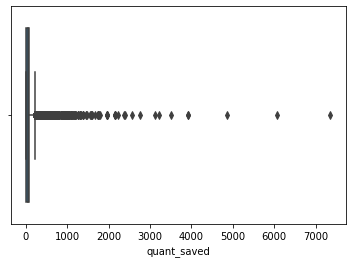

In [2]:
import seaborn as sns
df=pd.read_csv('C113 proj.csv')
sns.boxplot(data=df,x=df['quant_saved'])

In [3]:
q1=df['quant_saved'].quantile(0.25)
q3=df['quant_saved'].quantile(0.75)
iqr=q3-q1
print(f'Q1 {q1}')
print(f'Q3 {q3}')
print('iqr', iqr)
lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr
print(f'lower whisker {lower_whisker}')
print(f'upper whisker {upper_whisker}')
new_df=df[df['quant_saved']<upper_whisker]

Q1 2.2840000000000003
Q3 86.514
iqr 84.22999999999999
lower whisker -124.06099999999998
upper whisker 212.85899999999998


In [4]:
import statistics as st
all_savings=new_df['quant_saved'].tolist()
print(f'mean of savings {st.mean(all_savings)}')
print(f'mode of savings {st.mode(all_savings)}')
print(f'median of savings {st.median(all_savings)}')
print(f'stdev of savings {st.stdev(all_savings)}')
fig=ff.create_distplot([new_df['quant_saved'].tolist()],['savings'],show_hist=False)
fig.show()

mean of savings 46.200519389818794
mode of savings 0.0
median of savings 36.0475
stdev of savings 50.866871917288634


In [5]:
import random
import plotly.graph_objects as go
sampling_mean_list=[]
for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(st.mean(temp_list))
mean_sampling=st.mean(sampling_mean_list)
fig=ff.create_distplot([sampling_mean_list],['savings(sampling data)'],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.1],mode='lines',name='Mean'))
fig.show()

In [6]:
import statistics as st
print(f'stdev of sample data {st.stdev(sampling_mean_list)}')
print(mean_sampling)
mean_of_population=st.mean(all_savings)
print(f'mean of population {mean_of_population}')

stdev of sample data 5.165857824220958
46.29422457614516
mean of population 46.200519389818794


In [7]:
print(f'mean of population: {st.mean(all_savings)}')
print(f'mean of sampling Distribution: {mean_sampling}')

mean of population: 46.200519389818794
mean of sampling Distribution: 46.29422457614516


In [10]:
temp_df=new_df[new_df.highschool_completed!=0]
highschool=temp_df['highschool_completed'].tolist()
savings=temp_df['quant_saved'].tolist()
correlation= np.corrcoef(highschool,savings)
print(f'correlation between highschool and savings are: {correlation[0,1]}')

correlation between highschool and savings are: nan


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning:

invalid value encountered in true_divide



In [15]:
wealthy_df=new_df.loc[new_df['wealthy']==1]
not_wealthy_df=new_df.loc[new_df['wealthy']==0]

print(wealthy_df.head())
print(not_wealthy_df.head())


   quant_saved  female  highschool_completed  wealthy
1      39.2724       0                     1        1
3      58.9086       1                     1        1
4      78.5448       1                     1        1
5      39.2724       1                     1        1
6      32.7270       1                     1        1
    quant_saved  female  highschool_completed  wealthy
0     13.090800       1                     0        0
9     52.363200       1                     0        0
14    78.544800       1                     1        0
15    46.152332       1                     1        0
21     2.284000       1                     1        0


In [17]:
fig=ff.create_distplot([not_wealthy_df['quant_saved'].tolist()],['Savings (went to highschool)'],show_hist=False)
fig.show()

In [26]:
not_highschool_savings= not_wealthy_df['quant_saved'].tolist()

sampling_mean_list_not_highschool =[]
for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(not_highschool_savings))
  sampling_mean_list_not_highschool.append(st.mean(temp_list))
mean_sampling_not_highschool=st.mean(sampling_mean_list_not_highschool)
stdev_sampling_not_highschool=st.stdev(sampling_mean_list_not_highschool)

print(f'mean of sampling (no highschool): {mean_sampling_not_highschool}')
print(f'stdev of sampling mean(no highschool):{stdev_sampling_not_highschool}')
fig=ff.create_distplot([sampling_mean_list_not_highschool],['saving(sampling)'],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling],y=[0,0.1],mode='lines',name='mean') )

mean of sampling (no highschool): 45.483509974892186
stdev of sampling mean(no highschool):5.113673269264042


In [29]:
first_standard_deviation_start=mean_sampling_not_highschool-stdev_sampling_not_highschool
first_standard_deviation_end=mean_sampling_not_highschool+stdev_sampling_not_highschool

second_standard_deviation_start=mean_sampling_not_highschool-(2*stdev_sampling_not_highschool)
second_standard_deviation_end=mean_sampling_not_highschool+(2*stdev_sampling_not_highschool)

third_standard_deviation_start=mean_sampling_not_highschool-(3*stdev_sampling_not_highschool)
third_standard_deviation_end=mean_sampling_not_highschool+(3*stdev_sampling_not_highschool)

print(f'first(start) {first_standard_deviation_start} and first(end) {first_standard_deviation_end}')
print(f'second(start) {second_standard_deviation_start} and second(end) {second_standard_deviation_end}')
print(f'third(start) {third_standard_deviation_start} and third(end) {third_standard_deviation_end}')








first(start) 40.369836705628146 and first(end) 50.59718324415623
second(start) 35.256163436364105 and second(end) 55.71085651342027
third(start) 30.14249016710006 and third(end) 60.82452978268431


In [32]:
highschool_savings=new_df['quant_saved'].tolist()

sampling_mean_list_highschool=[]
for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(highschool_savings))
  sampling_mean_list_highschool.append(st.mean(temp_list))
mean_sampling_highschool=st.mean(sampling_mean_list_highschool)
stdev_sampling_highschool=st.stdev(sampling_mean_list_highschool)
print(f'mean of sampling data(highschool): {mean_sampling_highschool}')
print(f'stdev of sampling data(highschool): {stdev_sampling_highschool}')
ff.create_distplot([sampling_mean_list_highschool],['saving(sampling)'],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.1],mode='lines',name='mean(highschool)'))
fig.show()

mean of sampling data(highschool): 46.55500633349565
stdev of sampling data(highschool): 5.1820813248042015


In [33]:
z_score=(mean_sampling_highschool - mean_sampling_not_highschool)/stdev_sampling_not_highschool
print(f'z-score is - {z_score}')

z-score is - 0.20953555344330219
